In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats
from sklearn.linear_model import LinearRegression

In [4]:
events = pd.read_csv('./nonclients.csv', encoding='utf-8')

In [5]:
events.Date = pd.to_datetime(events.Date, format='%d/%m/%Y')
events.set_index('Date', inplace=True)

In [6]:
events.head()

,Client,NonClient
Date,,
2019-04-21,1,0
2019-04-28,0,0
2019-05-05,0,1
2019-05-12,0,2
2019-05-19,1,1


In [7]:
model = LinearRegression()

In [8]:
features = events[['NonClient']]
target = events['Client']

In [9]:
model.fit(features, target)

LinearRegression()

In [10]:
model.intercept_, model.coef_

(1.5944278606965174, array([-0.12985075]))

So the regression line sklearn has fit to our data has an intercept of 1.59 and a slope of -0.130. So its equation is
$$\mathrm{Client Event} = -0.130\times\mathrm{NonClient Event} - 1.59$$

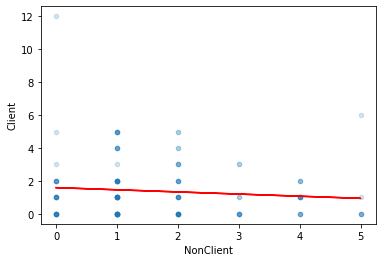

In [11]:
fig, axes = plt.subplots()

events.plot(kind='scatter', x='NonClient', y='Client', alpha=0.2, ax=axes)
axes.plot(events['NonClient'], model.predict(events[['NonClient']]), color='red');

In [12]:
model.score(features, target)

0.010141553885965493

In [13]:
from sklearn.metrics import mean_squared_error as mse

In [14]:
mse(model.predict(features), target)

2.9403635157545605

In [15]:
mse(model.predict(features), target) ** 0.5

1.714748820018419

In [16]:
pearsonr(events.Client, events.NonClient)

(-0.10070528231411419, 0.22012914774330686)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

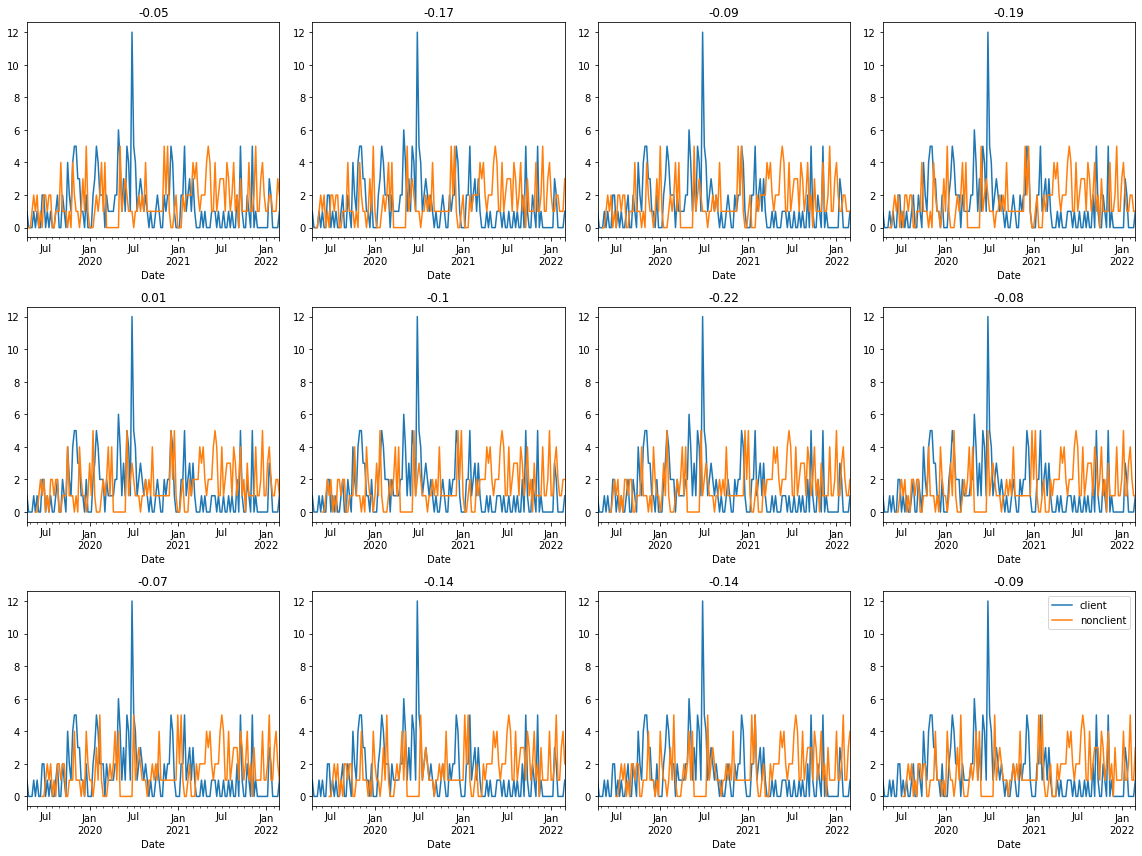

In [41]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16,12))

shift = 1

for row in range(3):
    for col in range(4):
        events.Client.plot(ax=ax[row][col], label="client")
        shifted = events.NonClient.shift(shift)
        shifted.plot(ax=ax[row][col], label="nonclient")
        corr, _ = pearsonr(events.Client.iloc[shift:], shifted.iloc[shift:])
        corr = round(corr, 2)
        ax[row][col].set_title(corr)
        shift += 1
        plt.legend()
fig.tight_layout()